LAB 03 12/09/2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

E1. Given the image canyon.png load it using OpenCV, split the channels and save each channel in a new image called as the channel. For instance, the red channel have to be saved as red.png  


(np.float64(-0.5), np.float64(799.5), np.float64(550.5), np.float64(-0.5))

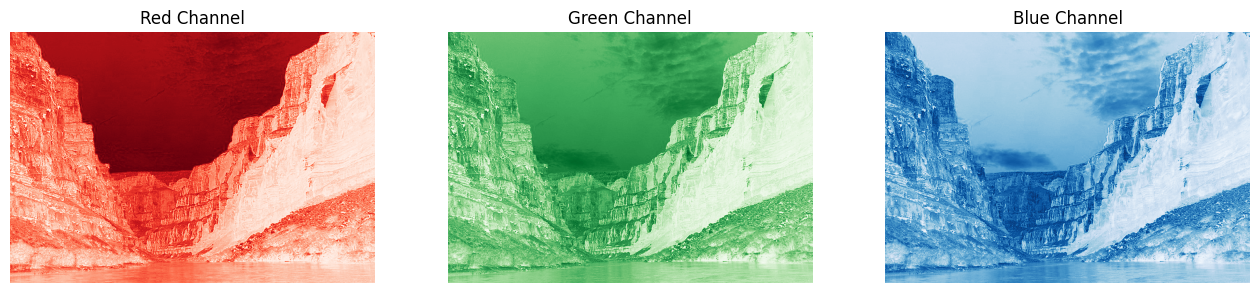

In [17]:
image = plt.imread('C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\Canyon.png')

# Chuyển ảnh từ BGR sang RGB (do OpenCV mặc định đọc ảnh ở định dạng BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Chia kênh màu
(r, g, b) = cv2.split(image_rgb)

# Hiển thị các kênh màu
plt.figure(figsize=(16,8))

plt.subplot(1, 3, 1)
plt.imshow(r, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

E2. Using the same image of the previous exercise, load it as gray-scale and replace all pixels with intensity lower than 80 with 0, 1 otherwise. Save it both as a new image, called mask.png, and as npy. Finally, apply the mask to the original image, keeping the original value where the mask is 1, 0 otherwise


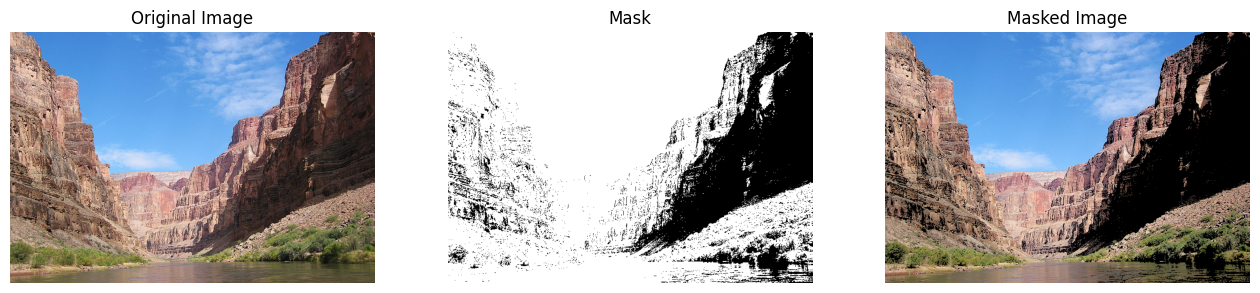

In [45]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\Canyon.png'
image = plt.imread(image_path)
if image is None:
    print(f"Không thể tải ảnh từ {image_path}. Kiểm tra lại đường dẫn hoặc file.")
else:
    # Chuyển ảnh từ float32 (0-1) sang uint8 (0-255) nếu ảnh là kiểu float
    image = (image * 255).astype(np.uint8)

    # Chuyển ảnh sang grayscale (chuyển ảnh màu sang ảnh đơn sắc)
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Tạo mặt nạ: Tất cả pixel có độ sáng nhỏ hơn 80 sẽ thành 0, những pixel khác thành 1
    mask = np.where(image_gray < 80, 0, 1).astype(np.uint8)

    # Lưu mặt nạ vào file mask.png và mask.npy
    cv2.imwrite('mask.png', mask * 255)  # Chuyển mask từ 0,1 sang 0,255 để hiển thị
    np.save('mask.npy', mask)

    # Áp dụng mặt nạ lên ảnh gốc: giữ lại giá trị gốc khi mask = 1, 0 khi mask = 0
    image_masked = image * mask[:, :, None]  # Thêm chiều thứ ba để áp dụng mặt nạ trên từng kênh màu

    # Lưu ảnh đã áp dụng mặt nạ
    cv2.imwrite('masked_image.png', image_masked)
    
    # Hiển thị kết quả
    plt.figure(figsize=(16,8))
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(image_masked)
    plt.title('Masked Image')
    plt.axis('off')

    plt.show()

E3. Using Matplotlib, display intensity values of canyon.png (loaded as grayscale image) in a bar chart. In particular, for each intensity value, the height of the column is the number of pixels that have such intensity value

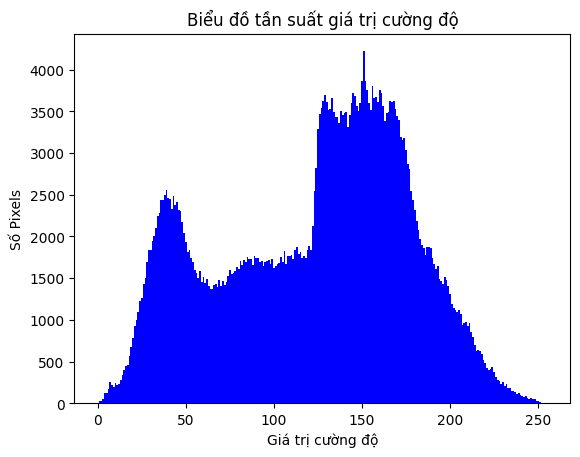

In [46]:
image_path = 'C:\\Users\\Trung Tin\\Tài liệu\\IUH\\Xử lý ảnh\\Labs\\Pictures\\Canyon.png'
image = plt.imread(image_path)
if image is None:
    print(f"Không thể tải ảnh từ {image_path}. Kiểm tra lại đường dẫn hoặc file.")
else:
    # Chuyển ảnh từ float32 (0-1) sang uint8 (0-255)
    image = (image * 255).astype(np.uint8)

    # Chuyển ảnh sang grayscale (chuyển ảnh màu sang ảnh đơn sắc)
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Tính histogram (đếm số lượng pixel cho mỗi giá trị độ sáng)
    hist, bins = np.histogram(image_gray.flatten(), bins=256, range=[0, 256])

    # Vẽ biểu đồ cột
    plt.bar(bins[:-1], hist, width=1, color='blue') 
    plt.title('Biểu đồ tần suất giá trị cường độ')
    plt.xlabel('Giá trị cường độ')
    plt.ylabel('Số Pixels')
    plt.show()